# EECS 738 Final Project
### Data Exploration and Initial Modeling Strategies

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('../data/train.csv', engine='python')

In [3]:
# look at 75% of the data
df = df.sample(frac=0.33, replace=True, random_state=1)

In [4]:
df.head(4)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
128037,398762,0.0,Selling fear is very profitable.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,142117,approved,0,0,0,4,0,0.0,0,7
491755,846712,0.0,I miss and love you very much. Dad,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,161514,approved,0,0,0,1,0,0.0,0,4
470924,821685,0.0,find a new hobby,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,161101,approved,3,1,0,0,0,0.0,0,4
491263,846087,0.2,"You can't ""disagree"" with facts that have been...",0.0,0.0,0.0,0.2,0.0,NaN,NaN,...,161371,approved,0,0,0,0,0,0.0,0,5


In [5]:
# get rid of bad data
df = df.dropna()

In [6]:
# take a look
df.shape

(77450, 45)

In [7]:
df.dtypes

id                                       int64
target                                 float64
comment_text                            object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 float64
latino                                 float64
male         

In [8]:
# add some weak NLP stuff 
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df['comment_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [9]:
# split the data
import numpy as np
from sklearn.model_selection import train_test_split
tr = df.loc[:, df.columns != 'target']
tr = tr.loc[:, tr.columns != 'comment_text']
tr = tr.drop('created_date', axis = 1)
tr = tr.drop('rating', axis = 1)
tr = tr.drop('id', axis = 1)

In [10]:
# look at polarity and subjectivity
feats = ['polarity', 'subjectivity']
labs = ['target']
features = df[feats]
labels = df[labs]
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=42)

In [11]:
# set up decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt_regressor = DecisionTreeRegressor(random_state=0)

In [12]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [13]:
dt_scores = cross_val_score(dt_regressor, X_train, y_train, cv=10)

In [14]:
print("Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

Accuracy: -0.35 (+/- 0.08)


In [15]:
# set up generic linear regression
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression().fit(X_train, y_train)

In [17]:
linreg_scores = cross_val_score(linreg, X_test, y_test, cv=10)

In [18]:
print("Accuracy: %0.2f (+/- %0.2f)" % (linreg_scores.mean(), linreg_scores.std() * 2))

Accuracy: 0.03 (+/- 0.01)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

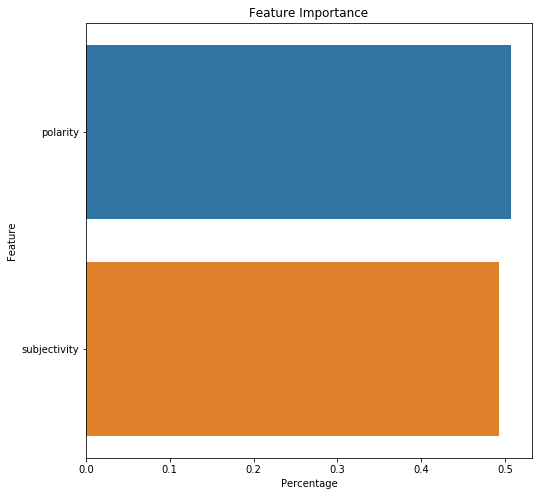

In [20]:
# check out feature importances
feats = {} 
for feature, importance in zip(X_train.columns, sorted(dt_regressor.feature_importances_, reverse=True)[:7]):
    feats[feature] = importance 

# graph
bar = pd.DataFrame.from_dict(feats, orient='index')
bar['index'] = bar.index.tolist()
plt.figure(figsize=(8,8))
ax = sns.barplot(x=0, y='index',data=bar)
ax.set(xlabel='Percentage', ylabel='Feature', title="Feature Importance")
plt.show()

Clearly, the most important feature was 'severe toxicity' 

The NLP engineered features don't really seem to be very important. It was worth a shot!

In [21]:
df.dtypes

id                                       int64
target                                 float64
comment_text                            object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 float64
latino                                 float64
male         

In [22]:
# look at the religions
feats = ['jewish', 'muslim', 'hindu', 'christian', 'buddhist', 'atheist', 'other_religion']
labs = ['target']
features = df[feats]
labels = df[labs]
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=42)

In [23]:
# set up decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt_regressor = DecisionTreeRegressor(random_state=0)

In [24]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [25]:
dt_scores = cross_val_score(dt_regressor, X_train, y_train, cv=10)

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

Accuracy: 0.01 (+/- 0.01)


In [27]:
# set up generic linear regression
from sklearn.linear_model import LinearRegression

In [28]:
linreg = LinearRegression().fit(X_train, y_train)

In [29]:
linreg_scores = cross_val_score(linreg, X_test, y_test, cv=10)

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (linreg_scores.mean(), linreg_scores.std() * 2))

Accuracy: 0.02 (+/- 0.01)


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

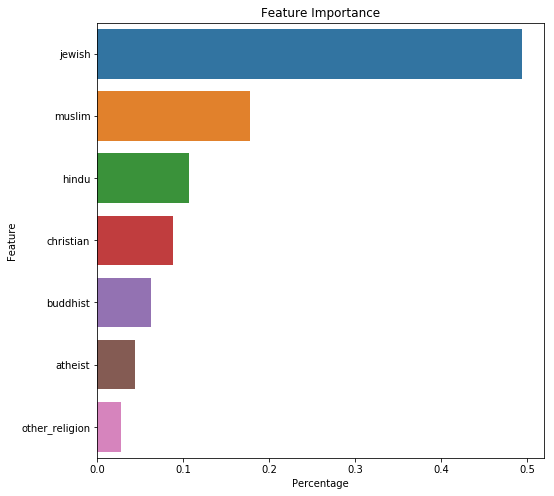

In [32]:
# check out feature importances
feats = {} 
for feature, importance in zip(X_train.columns, sorted(dt_regressor.feature_importances_, reverse=True)[:7]):
    feats[feature] = importance 

# graph
bar = pd.DataFrame.from_dict(feats, orient='index')
bar['index'] = bar.index.tolist()
plt.figure(figsize=(8,8))
ax = sns.barplot(x=0, y='index',data=bar)
ax.set(xlabel='Percentage', ylabel='Feature', title="Feature Importance")
plt.show()

### Takeaways
1. These models aren't so good at predicting the scores for toxicity. Perhaps more features could be added, but initial testing with more features led to an overfit. 
2. Perhaps some neural network is better in the long run. This will allow a better way of using only comment text in predictions. 